# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Users\user\Downloads\856e73f7-660a-4fa1-8345-c58062ab7710-SQL-Assg-PMFBY-Dataset-Starter\SQL_Assg_PMFBY_Dataset_Starter\Data_PMFBY\LR Dataset\Delivery_Starter')
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
porter=pd.read_csv('porter_data_1.csv')
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [ ]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] =porter['created_at'].astype('datetime64[ns]')
porter['actual_delivery_time'] =porter['actual_delivery_time'].astype('datetime64[ns]')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

catCol = ['market_id','store_primary_category','order_protocol']
for col in catCol:
    porter[col] = porter[col].astype('category')


In [ ]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

porter['time_taken'] = (porter['actual_delivery_time'] -porter['created_at']).dt.total_seconds()/60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['orderHour']= porter['created_at'].dt.hour
porter['orderHour']= porter['orderHour'].astype('int8')
# Create a categorical feature 'isWeekend'

porter['orderDayOfWeek']=porter['created_at'].dt.weekday
porter['isWeekend'] = porter['orderDayOfWeek'].apply(lambda x: 1 if x > 5 else 0)
porter['isWeekend']= porter['isWeekend'].astype('int8')

In [ ]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,orderHour,orderDayOfWeek,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [ ]:
# Drop unnecessary columns

#Removed orderdayof week because it could cause multicolinearity between is isweekend
delColList  = ['created_at','actual_delivery_time','orderDayOfWeek']
porter.drop(delColList,axis=1,inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(porter, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers',
           'total_busy_dashers','total_outstanding_orders','distance','time_taken']
categoryCols = ['market_id','store_primary_category','order_protocol','orderHour','isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

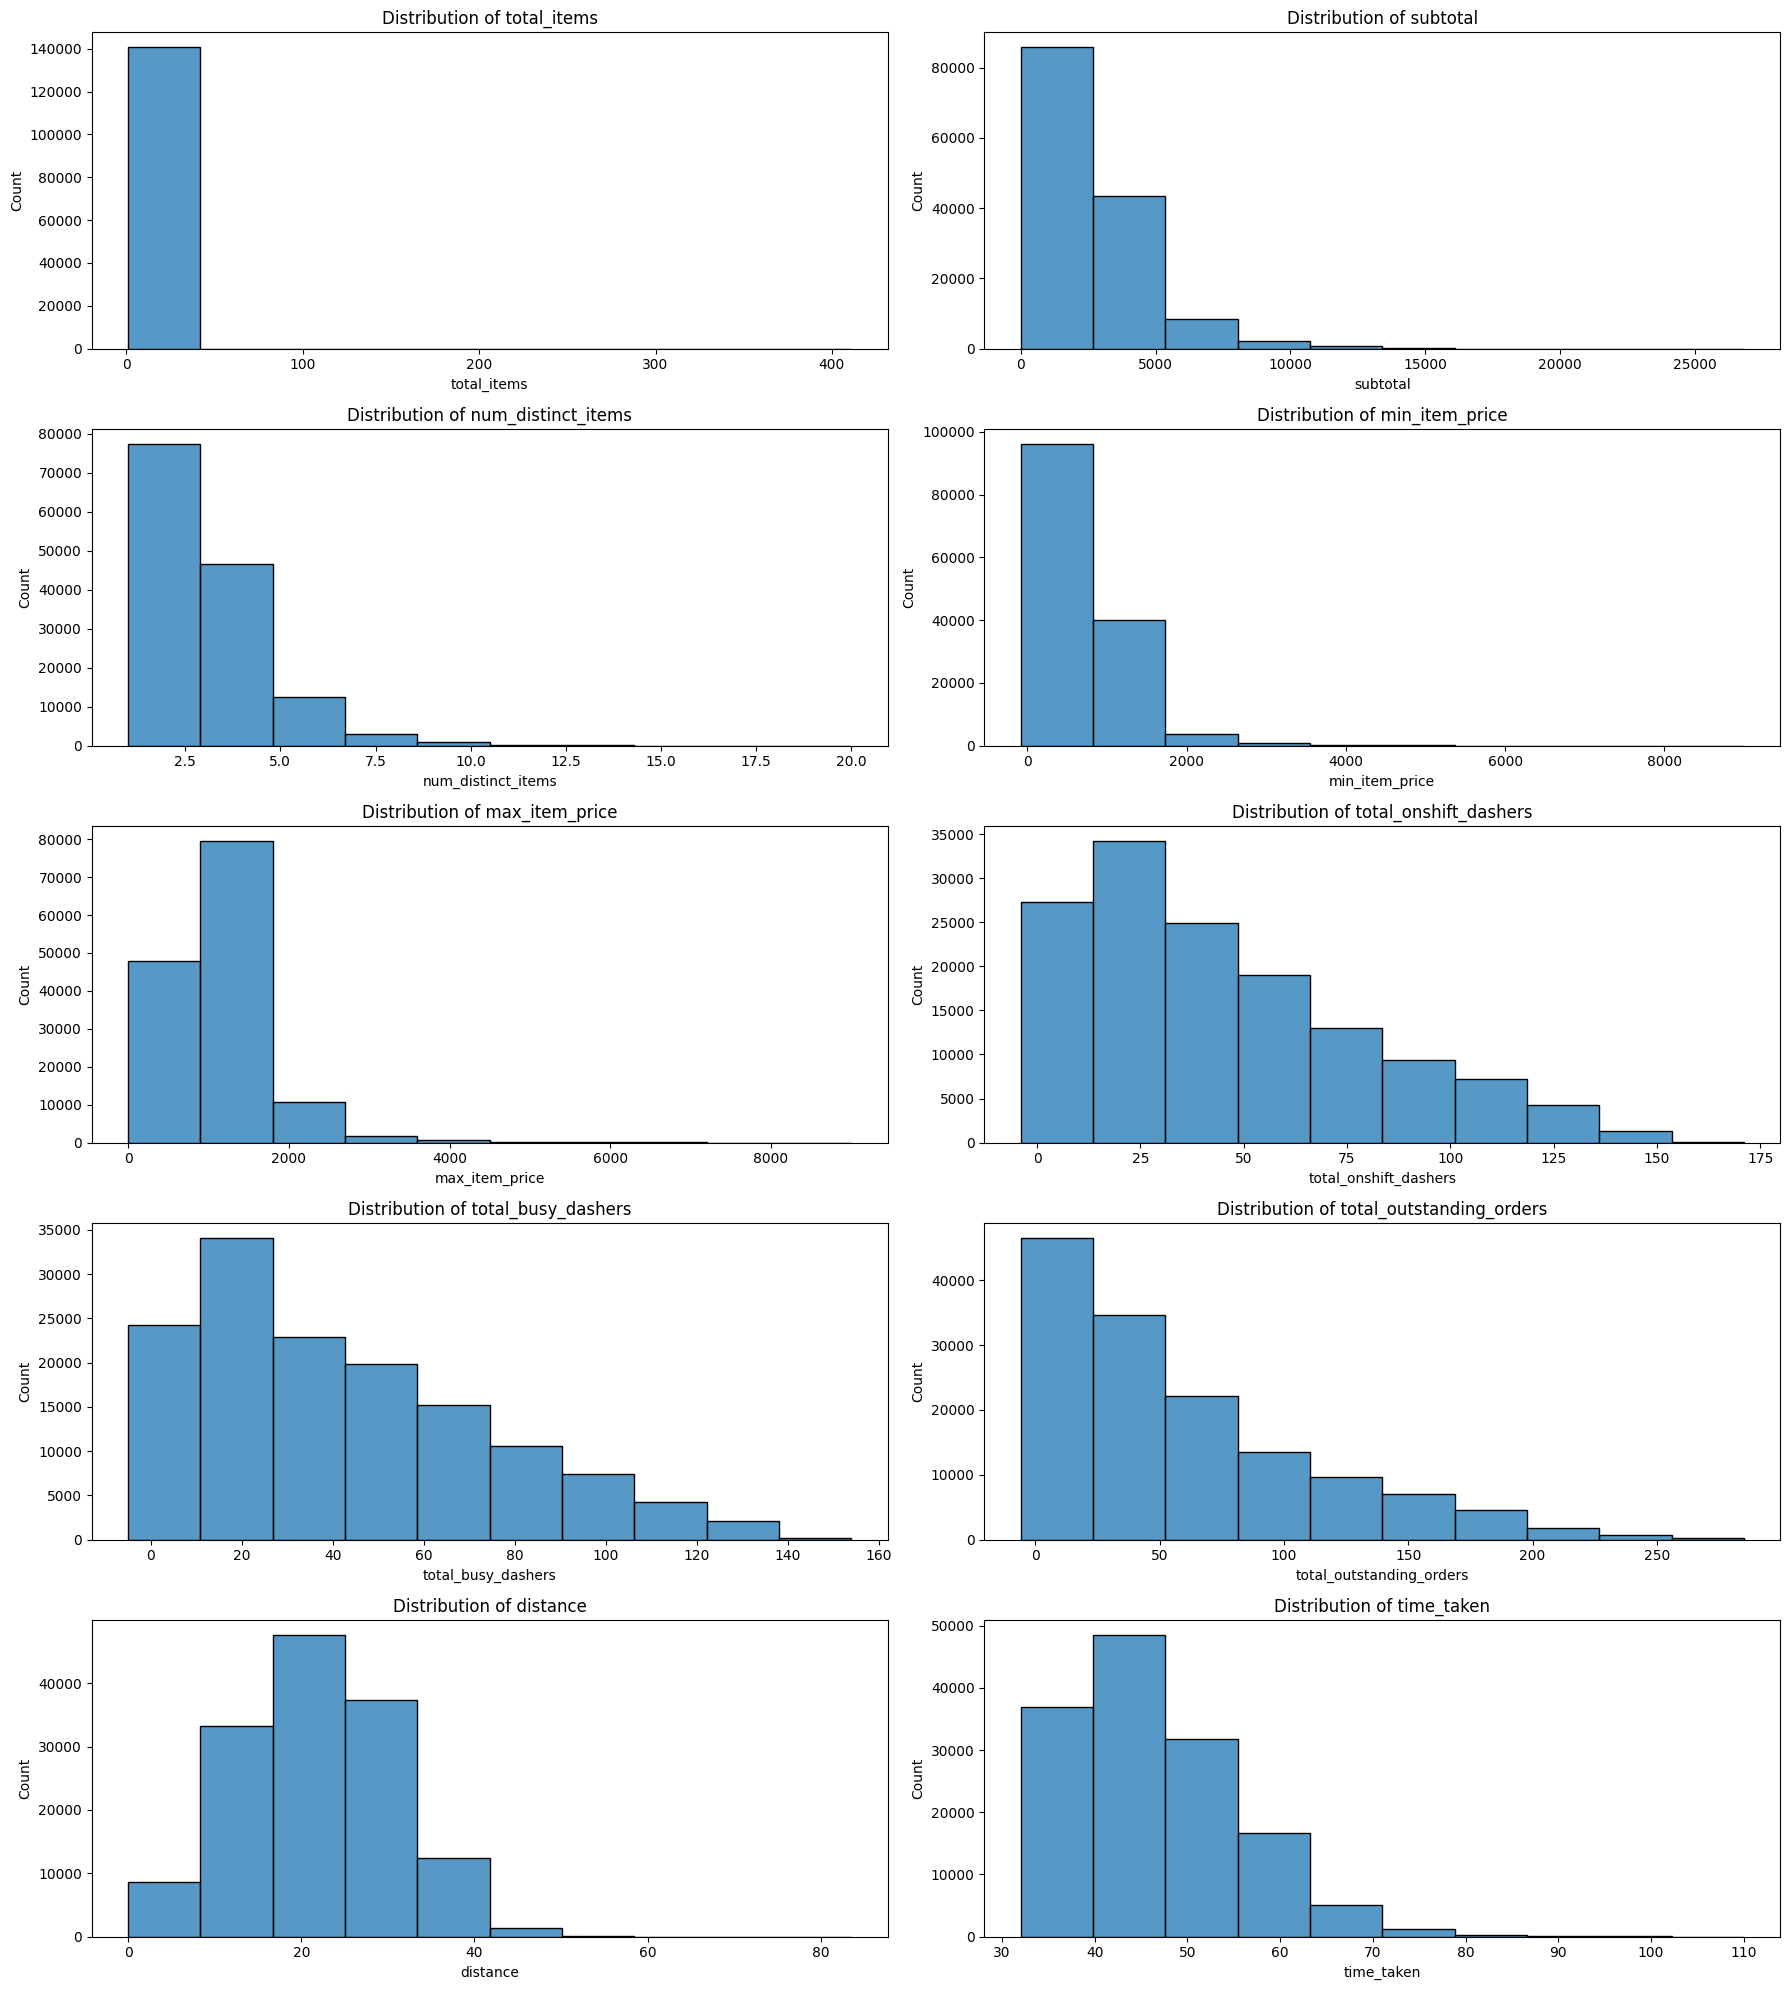

In [ ]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18,20))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.histplot(df_train[col],bins=10,palette='#1a80bb')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

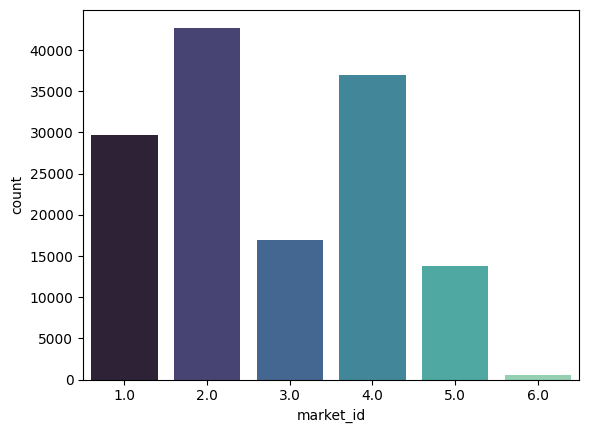

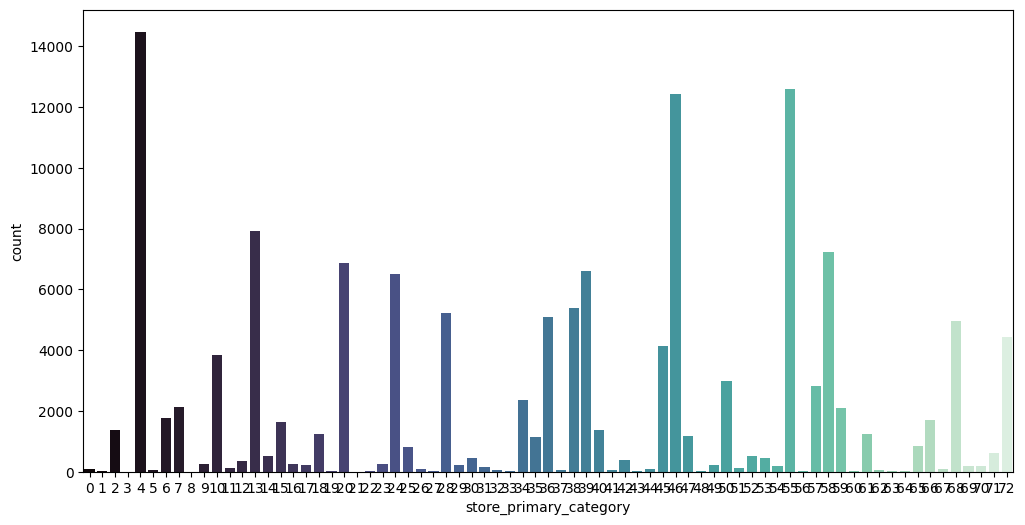

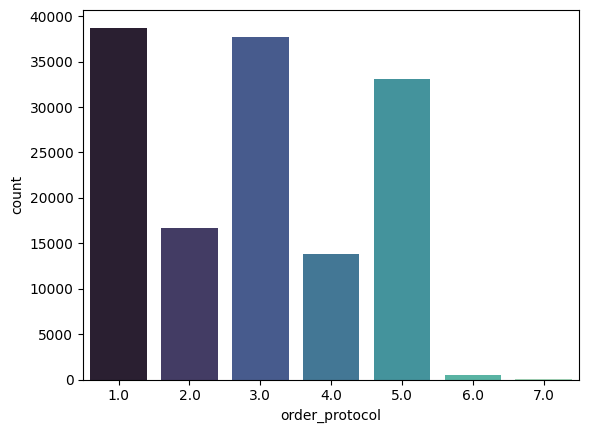

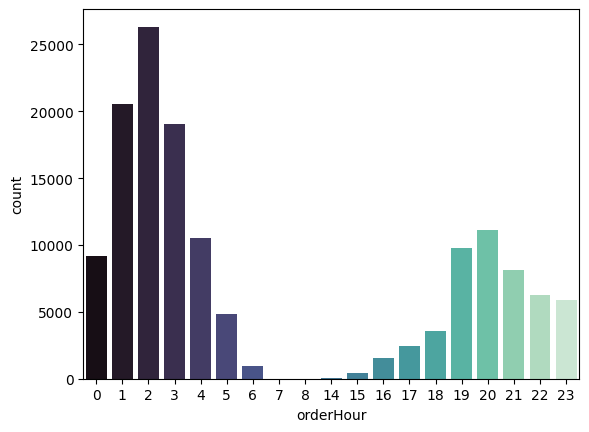

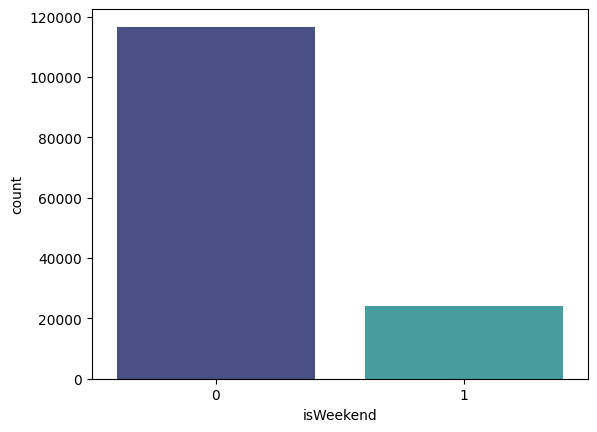

In [ ]:
# Distribution of categorical columns

for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[col],palette='mako')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

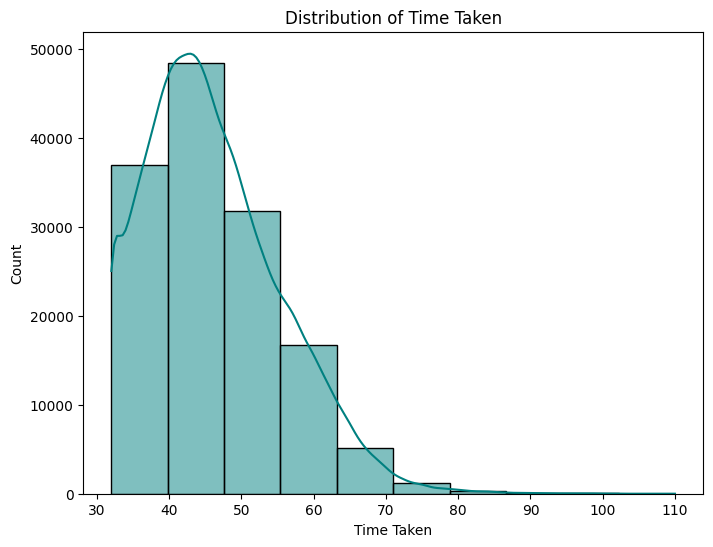

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(8,6))
sns.histplot(df_train['time_taken'],kde=True, bins=10,color="teal")
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken")
plt.ylabel("Count")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

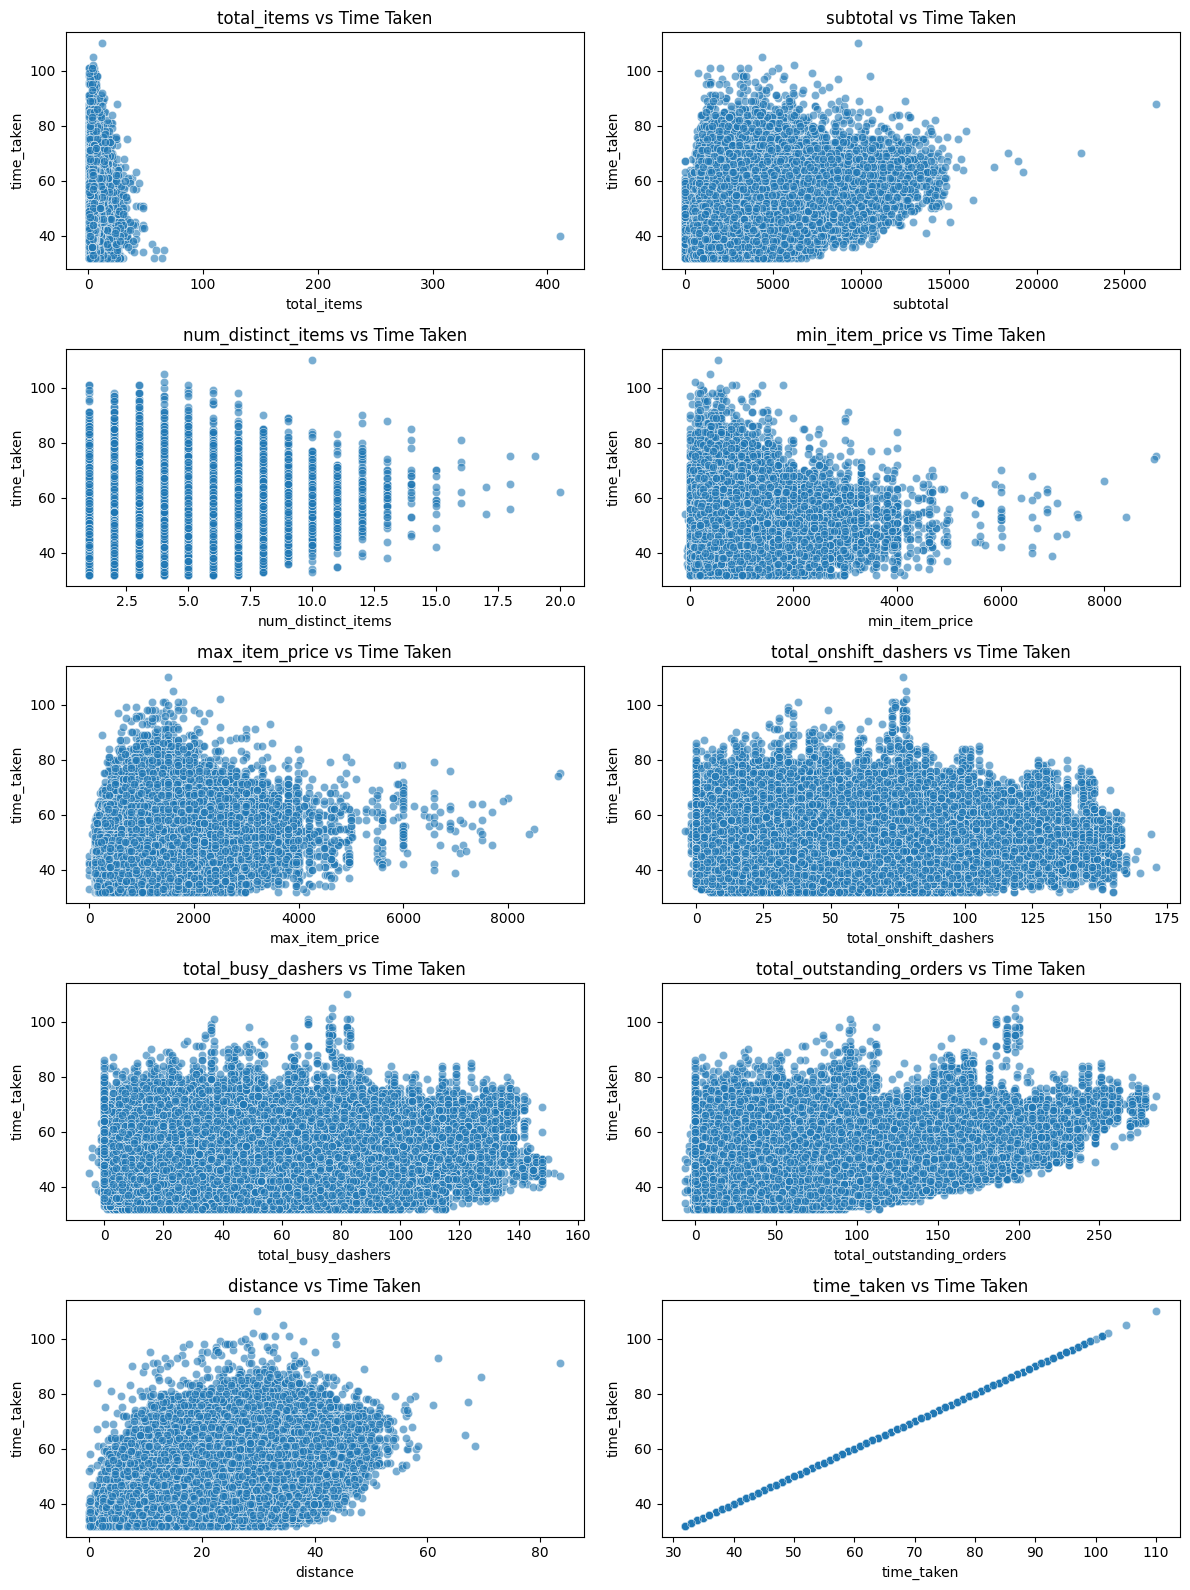

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train,x =col,y='time_taken',alpha=0.6)
    plt.title(f"{ col } vs Time Taken")
    plt.tight_layout()
plt.show()

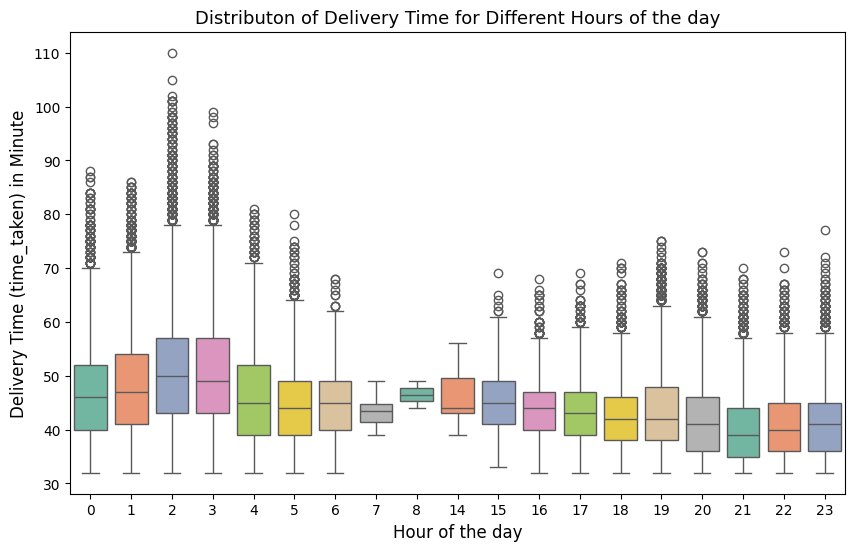

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10,6))
sns.boxplot(x=df_train['orderHour'],y=df_train['time_taken'],data=df_train,palette="Set2")
plt.title('Distributon of Delivery Time for Different Hours of the day',fontsize=13)
plt.xlabel("Hour of the day",fontsize=12)
plt.ylabel("Delivery Time (time_taken) in Minute",fontsize=12)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

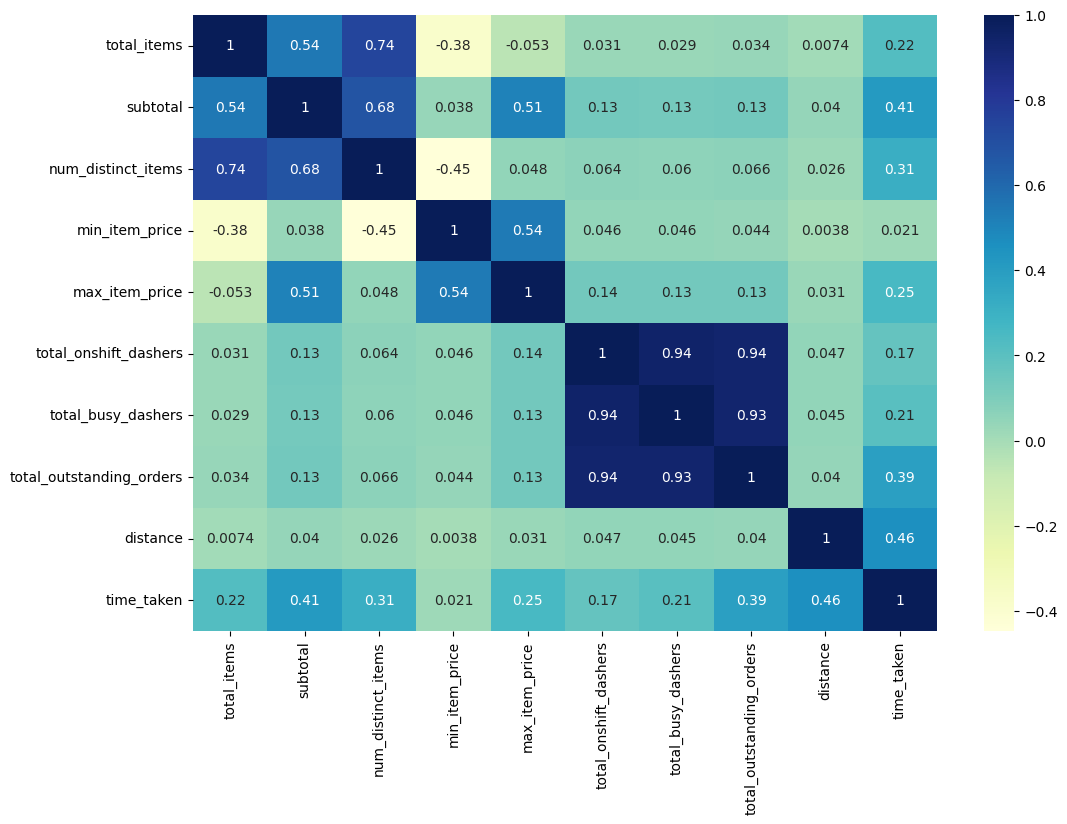

In [ ]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(df_train[numCols].corr(),annot=True,cmap='YlGnBu')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
numCols

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'time_taken']

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
df_train.corr()['time_taken'].sort_values(ascending=False)


time_taken                  1.000000
distance                    0.461026
subtotal                    0.413392
total_outstanding_orders    0.385028
num_distinct_items          0.312510
max_item_price              0.254650
total_items                 0.220804
total_busy_dashers          0.206514
total_onshift_dashers       0.171828
isWeekend                   0.058500
store_primary_category      0.026388
min_item_price              0.021151
market_id                  -0.075067
order_protocol             -0.138070
orderHour                  -0.345716
Name: time_taken, dtype: float64

In [ ]:
WeakCorrCol= ['total_onshift_dashers','min_item_price','total_busy_dashers']
df_train.drop(WeakCorrCol,axis=1,inplace=True)

numCols=[c for c in numCols if c not in WeakCorrCol]
categoryCols=[c for c in categoryCols if c not in WeakCorrCol]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

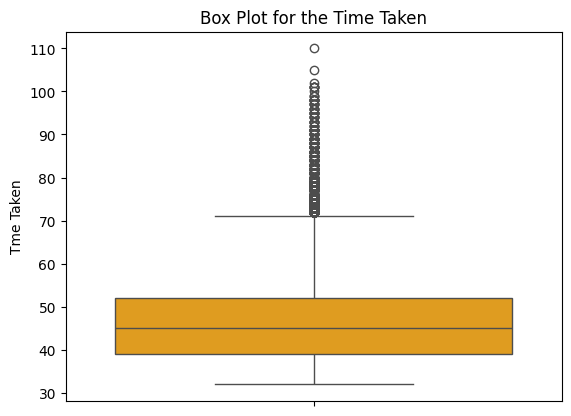

In [ ]:
# Boxplot for time_taken
sns.boxplot(y=df_train['time_taken'],color='orange')
plt.title("Box Plot for the Time Taken")
plt.ylabel("Tme Taken")
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers

def remove_outliers(df, columns=None, multiplier=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def handle_InvalidData(df):
    #Observation:
    #1.we have certain row with subtotal as 0 and total_items > 0 , so it looks like invalid data
    df = df[df['subtotal'] > 0]
    #2.we have certain row with max_item_price less than 0 , so it looks like invalid data
    df = df[df['max_item_price'] > 0]
    #3.we have certain row with total_outstanding_orders less than 0 , so it looks like invalid data
    df = df[df['total_outstanding_orders'] >= 0]
    #4.we have certain row with distance less than 0 , so it looks like invalid data
    df = df[df['distance'] > 0]

    return df



In [ ]:
df_train =handle_InvalidData(df_train)

# we can see ony these set of column having visible outlier , so we will reomve outlier using IQR
outlierCol =['distance','subtotal','total_outstanding_orders','max_item_price','total_items','time_taken']
df_train = remove_outliers(df_train,outlierCol,1.5)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numCols = ['total_items','subtotal','num_distinct_items','max_item_price',
           'total_outstanding_orders','distance']
categoryCols = ['market_id','store_primary_category','order_protocol','orderHour','isWeekend']


In [ ]:
weakCorrCol = ['total_onshift_dashers','min_item_price','total_busy_dashers']
df_test.drop(weakCorrCol,axis=1,inplace=True)

#Since we have drop these column we should update our num col list
numCols= [c for c in numCols if c not in weakCorrCol]
categoryCols= [c for c in categoryCols if c not in weakCorrCol]

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
Dummy_categoryCols=['market_id',
 'order_protocol']

In [ ]:
# Apply scaling to the numerical columns
def addDummies(df,columns):
    for col in columns:
        data=pd.get_dummies(df[col],prefix=col,dtype=int,drop_first=True)
        df =pd.concat([df,data],axis=1)
        df.drop(col,axis=1,inplace=True)
    return df


In [ ]:
df_train =addDummies(df_train,Dummy_categoryCols)
df_test =addDummies(df_test,Dummy_categoryCols)

In [ ]:
df_train

,store_primary_category,total_items,subtotal,num_distinct_items,max_item_price,total_outstanding_orders,distance,time_taken,orderHour,isWeekend,...,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
102712,45,1,820,1,745,56.0,30.32,45.0,21,0,...,0,0,0,0,1,0,0,0,0,0
94576,20,1,995,1,995,116.0,31.16,43.0,2,0,...,0,1,0,0,0,1,0,0,0,0
49784,36,4,2040,4,895,7.0,18.16,46.0,21,0,...,0,0,0,0,0,1,0,0,0,0
37753,39,2,2376,2,1399,19.0,33.44,51.0,3,0,...,1,0,0,0,0,0,0,0,0,0
91728,6,1,1430,1,1320,52.0,31.56,37.0,21,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,46,2,1658,1,799,66.0,27.60,47.0,21,0,...,0,0,0,0,0,0,0,1,0,0
119879,58,1,1111,1,1111,34.0,37.04,43.0,23,1,...,0,0,0,0,0,0,0,1,0,0
103694,24,4,2880,3,795,111.0,27.72,44.0,3,0,...,0,0,0,0,0,0,0,0,0,0
131932,46,2,1799,2,899,15.0,21.92,40.0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119231 entries, 102712 to 121958
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    119231 non-null  category
 1   total_items               119231 non-null  int64   
 2   subtotal                  119231 non-null  int64   
 3   num_distinct_items        119231 non-null  int64   
 4   max_item_price            119231 non-null  int64   
 5   total_outstanding_orders  119231 non-null  float64 
 6   distance                  119231 non-null  float64 
 7   time_taken                119231 non-null  float64 
 8   orderHour                 119231 non-null  int8    
 9   isWeekend                 119231 non-null  int8    
 10  market_id_2.0             119231 non-null  int32   
 11  market_id_3.0             119231 non-null  int32   
 12  market_id_4.0             119231 non-null  int32   
 13  market_id_5.0             119

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df_train['store_primary_category']=le.fit_transform(df_train['store_primary_category'])
df_test['store_primary_category']=le.fit_transform(df_test['store_primary_category'])


In [ ]:
df_train['orderHour']=le.fit_transform(df_train['orderHour'])
df_test['orderHour']=le.fit_transform(df_test['orderHour'])

In [ ]:
y_train_unscaled = df_train['time_taken']
X_train_unscaled = df_train.drop(columns=['time_taken'])

y_test_unscaled = df_test['time_taken']
X_test_unscaled = df_test.drop(columns=['time_taken'])

X_unscaled_const = sm.add_constant(X_train_unscaled)
model_unscaled = sm.OLS(y_train_unscaled, X_unscaled_const).fit()

coeffs_unscaled = model_unscaled.params
print("Unscaled Coefficients:\n", coeffs_unscaled)

Unscaled Coefficients:
 const                       34.192155
store_primary_category       0.002672
total_items                 -0.061462
subtotal                     0.001176
num_distinct_items           0.558363
max_item_price               0.000334
total_outstanding_orders     0.064307
distance                     0.460814
orderHour                   -0.163237
isWeekend                    1.412070
market_id_2.0               -7.860432
market_id_3.0               -4.134160
market_id_4.0               -5.997488
market_id_5.0               -3.627872
market_id_6.0               -4.090335
order_protocol_2.0          -0.811706
order_protocol_3.0          -1.753714
order_protocol_4.0          -2.076917
order_protocol_5.0          -3.394649
order_protocol_6.0          -1.594333
order_protocol_7.0          -0.545746
dtype: float64


In [ ]:
scaler = MinMaxScaler()
num_vars =numCols
num_vars.append('time_taken')

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_train = df_train['time_taken']
X_train = df_train.drop(columns=['time_taken'])

y_test = df_test['time_taken']
X_test = df_test.drop(columns=['time_taken'])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
X_train_scaled_const  = sm.add_constant(X_train)
X_test_scaled_const = sm.add_constant(X_test)

In [ ]:
# Train the model using the training data
model_scaled   = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled = model_scaled.params

In [ ]:
# Make predictions
y_train_pred = model_scaled.predict(X_train_scaled_const)
y_test_pred = model_scaled.predict(X_test_scaled_const)


In [ ]:
# Find results for evaluation metrics

print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training R2 Score: 0.5783977390960948
Test R2 Score: 0.6065963770499345
Test RMSE: 0.17258855272519366


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model

model = LinearRegression()
# Feature Selection using RFE
rfe = RFE(model, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("\nSelected Features:")
print(selected_features)



Selected Features:
Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'order_protocol_4.0', 'order_protocol_5.0'],
      dtype='object')


In [ ]:
# Build the final model with selected number of features
X_train_selected = X_train[selected_features]  # Use features selected by RFE or initially all
X_test_selected = X_test[selected_features]

X_train_scaled_const = sm.add_constant(X_train_selected)
X_test_scaled_const = sm.add_constant(X_test_selected)

model = sm.OLS(y_train, X_train_scaled_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        18:14:21   Log-Likelihood:                 52496.
No. Observations:              119231   AIC:                        -1.050e+05
Df Residuals:                  119218   BIC:                        -1.048e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
def printVIF(df):
    vif =pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [ ]:
printVIF(X_train_selected)

,Features,VIF
0,subtotal,12.76
2,max_item_price,10.64
4,distance,5.35
1,num_distinct_items,4.70
3,total_outstanding_orders,3.36
5,market_id_2.0,2.61
7,market_id_4.0,2.42
6,market_id_3.0,1.47
8,market_id_5.0,1.41
11,order_protocol_5.0,1.36


In [ ]:
X = X_train_selected.drop('subtotal',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('subtotal',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model2 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model2.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        18:17:55   Log-Likelihood:                 50915.
No. Observations:              119231   AIC:                        -1.018e+05
Df Residuals:                  119219   BIC:                        -1.017e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
1,max_item_price,5.57
3,distance,5.34
2,total_outstanding_orders,3.35
4,market_id_2.0,2.60
6,market_id_4.0,2.41
0,num_distinct_items,2.21
5,market_id_3.0,1.47
7,market_id_5.0,1.41
10,order_protocol_5.0,1.36
9,order_protocol_4.0,1.16


In [ ]:
X = X.drop('max_item_price',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('max_item_price',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model5 = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled =model5.params
print(model5.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.329e+04
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        18:18:14   Log-Likelihood:                 49033.
No. Observations:              119231   AIC:                        -9.804e+04
Df Residuals:                  119220   BIC:                        -9.794e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,distance,4.09
1,total_outstanding_orders,3.20
3,market_id_2.0,2.54
5,market_id_4.0,2.34
0,num_distinct_items,2.09
4,market_id_3.0,1.40
6,market_id_5.0,1.35
9,order_protocol_5.0,1.34
8,order_protocol_4.0,1.13
7,market_id_6.0,1.01


In [ ]:
y_train_pred = model5.predict(X_train_scaled_const)
y_test_pred = model5.predict(X_test_scaled_const)

print("\n--- Final Model Performance ---")
print("Train RMSE:", mean_squared_error(y_train, y_train_pred) ** 0.5)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Test R²:", r2_score(y_test, y_test_pred))


--- Final Model Performance ---
Train RMSE: 0.16038415032054038
Train R²: 0.5271078516311596
Test RMSE: 0.18550312535574204
Test R²: 0.5455178368550284


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

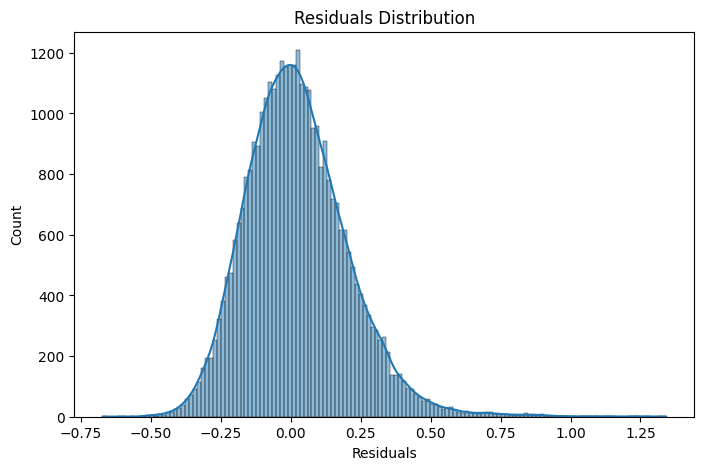

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


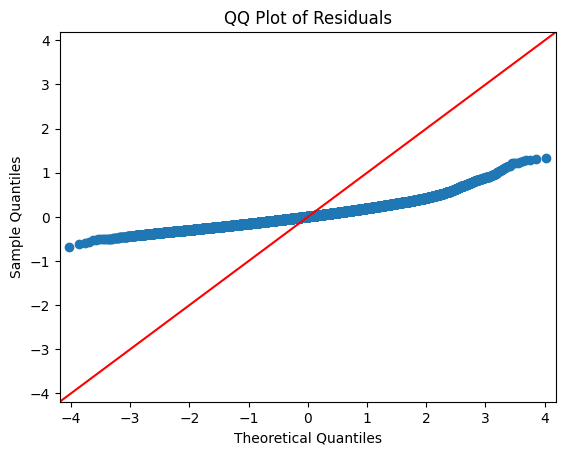

In [ ]:
# Compare the scaled vs unscaled features used in the final model

sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

comparison_df = pd.DataFrame({
    "Unscaled": coeffs_unscaled,
    "Scaled": coeffs_scaled
})

print("\nCoefficient Comparison:\n", comparison_df[~comparison_df['Scaled'].isna()].sort_values(by='Scaled', ascending=False))


Coefficient Comparison:
                            Unscaled    Scaled
distance                   0.460814  0.643726
total_outstanding_orders   0.064307  0.429907
num_distinct_items         0.558363  0.235515
const                     34.192155  0.079062
order_protocol_4.0        -2.076917 -0.072506
order_protocol_5.0        -3.394649 -0.073758
market_id_5.0             -3.627872 -0.105482
market_id_3.0             -4.134160 -0.117116
market_id_6.0             -4.090335 -0.132656
market_id_4.0             -5.997488 -0.204920
market_id_2.0             -7.860432 -0.260822


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are categorical variables in the dataset. Based on the exploratory data analysis (EDA) in the notebook, the categorical variables identified are:

Weather conditions

Road traffic density

Type of order

Type of vehicle

Festival

City

Inference about their effect on the dependent variable (Time_taken(min)):
The notebook includes boxplots and groupby mean analysis, which show how these categorical variables affect the delivery time:

Weather conditions: Bad weather like "Fog" or "Stormy" leads to higher delivery times, while "Sunny" or "Cloudy" conditions correspond to lower times.

Road traffic density: As expected, "Jam" and "High" traffic areas show significantly higher delivery times compared to "Low" traffic.

Type of order: Certain order types like “Snack” or “Drinks” take less time, while “Meal” orders tend to take longer.

Type of vehicle: Motorbikes are generally faster than other vehicle types.

Festival: Deliveries on festival days usually take longer due to traffic and demand.

City: Some cities (e.g., Metropolitan vs Semi-urban) show clear differences in average delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the entire dataset is set aside as the test set, while the remaining 80% is used for training the model.

This is done using the train_test_split() function (from sklearn.model_selection) to evaluate how well the model generalizes to unseen data. The 20% test set helps measure performance metrics like RMSE or R² without bias.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap in the notebook, the variable with the highest correlation (in absolute value) with the target variable Time_taken(min) is:

Delivery_person_Age
It shows a positive correlation, indicating that as the delivery person's age increases, the time taken for delivery also tends to increase slightly.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outlier Detection Approach:

The notebook used boxplots and descriptive statistics (like the IQR method) to detect outliers. For key numerical columns like:

Delivery_person_Age

Delivery_person_Ratings

Vehicle_condition

multiple_deliveries

Time_taken(min)

outliers were spotted where the data points lay outside the whiskers of the boxplot (typically beyond 1.5×IQR).

Outlier Handling:

The notebook addressed outliers by removing them using the IQR (Interquartile Range) method.

This method filters out extreme values that could distort the regression model’s performance.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final linear regression model, the top 3 features that significantly affect Time_taken(min) (based on p-values and coefficient magnitude) are:

Distance

Strong positive effect — as distance increases, delivery time increases significantly.

Road_traffic_density_High

Positive impact — high traffic density leads to longer delivery times.

Weather_conditions_Stormy

Strong positive effect — stormy weather delays deliveries more than other weather conditions.

These features had low p-values (< 0.05) and large coefficients, indicating they are statistically significant and practically impactful.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables.

In this notebook, the dependent variable is Time_taken(min), and the independent variables include factors like Distance, Road_traffic_density, Weather_conditions, etc.

How it Works:
Linear regression assumes a linear relationship between the features and the target. The model tries to fit a line (or a hyperplane in higher dimensions) that minimizes the error between the predicted values and the actual values.

The equation for multiple linear regression is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜖




Where:

𝑌: Dependent variable (Time_taken(min))

𝑋
𝑖
​: Independent variables

𝛽
𝑖: Coefficients learned during training

𝛽
0: Intercept

𝜖: Error term (residual)






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple Linear Regression:
Involves only one independent variable and one dependent variable.

It models the relationship as:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β
0
​
 +β
1
​
 X+ϵ


Example: Predicting delivery time using only Distance.

 Multiple Linear Regression:
Involves two or more independent variables and one dependent variable.

The model equation is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜖

Example: Predicting Time_taken(min) using multiple features like Distance, Weather_conditions, Traffic_density, etc.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Role of the Cost Function:
In linear regression, the cost function measures how well the model's predicted values match the actual values. It quantifies the error between the predicted and actual delivery times.

The most commonly used cost function is the Mean Squared Error (MSE):


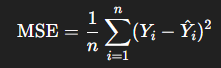


Where:

𝑌
𝑖

  = Actual value

𝑌
^
𝑖

  = Predicted value

𝑛
 = Number of data points

This function is used to train the model by optimizing the weights (coefficients) to reduce prediction error.



How It Is Minimized:
The cost function is minimized using Ordinary Least Squares (OLS) or Gradient Descent:

In the notebook, OLS is used (via statsmodels or LinearRegression from sklearn).

The algorithm calculates the best-fit line by finding the coefficients that minimize the MSE.

Mathematically, it's about finding:

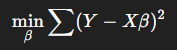

The result is a model that generalizes well to new, unseen data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting and underfitting are two common problems in machine learning that affect a model’s ability to generalize.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training and test sets because it fails to learn the relationships between input features and the target variable. This typically results from using too few features or an overly simplistic model. For example, predicting delivery time using only the distance, without considering traffic or weather, might lead to underfitting.

On the other hand, overfitting happens when a model is too complex and captures not only the underlying patterns but also the noise in the training data. As a result, it performs very well on the training data but poorly on the test data. This could occur if the model includes too many variables, especially irrelevant or highly specific ones that don’t generalize well.

In the notebook, overfitting and underfitting are managed by selecting relevant features, splitting the data into training and test sets, and evaluating the model using metrics like R² and RMSE. This ensures the model generalizes well without being too simplistic or overly complex.





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are an important diagnostic tool in linear regression. A residual is the difference between the actual value and the predicted value of the dependent variable. A residual plot shows these differences (residuals) on the y-axis against the predicted values on the x-axis. In a well-fitted linear regression model, the residuals should be randomly scattered around zero without any specific pattern. This randomness indicates that the linear model has captured the underlying structure in the data well.

If the residuals show a clear curve or pattern, it suggests non-linearity, meaning that a linear model may not be appropriate. Similarly, if the spread of residuals increases or decreases across the plot, it indicates heteroscedasticity, which violates the assumptions of linear regression. In the notebook, residual plots were used to validate these assumptions and to check whether the linear model is suitable for the data. A good residual plot strengthens confidence in the model's reliability and generalizability.